<a href="https://colab.research.google.com/github/cheth-dev/Mainflow_internship/blob/main/TASK5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

# Simulated sample dataset
np.random.seed(0)
data = pd.DataFrame({
    'Study Hours': np.random.uniform(0, 20, 100),
    'Attendance': np.random.uniform(50, 100, 100),
})
# Simple rule for label
data['Pass'] = ((data['Study Hours'] > 10) & (data['Attendance'] > 75)).astype(int)


<Axes: >

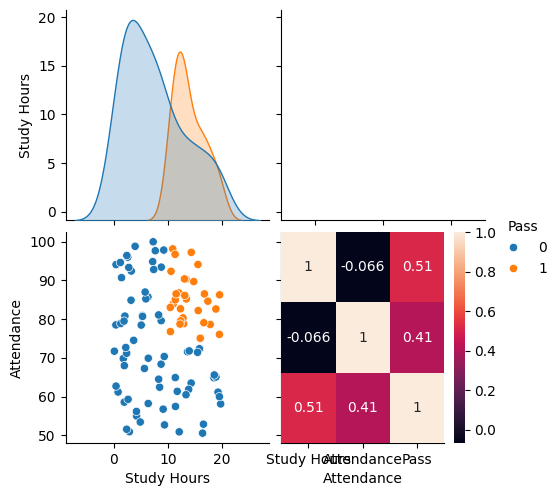

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(data, hue='Pass')
sns.heatmap(data.corr(), annot=True)


In [3]:
print(data.isnull().sum())


Study Hours    0
Attendance     0
Pass           0
dtype: int64


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data[['Study Hours', 'Attendance']]
y = data['Pass']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

Accuracy: 0.9


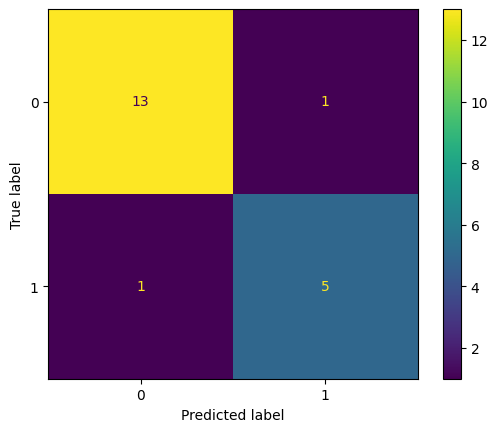

In [5]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
